In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [3]:
clear all;

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("C:\\kaggle datsets\\all_data.csv")
print(data.head())


  I want to start by saying Fred Flare  shipped this product very fast   And the transaction itself was very smooth  I do however  have extreme problems with the product itself  The product is not leather  its nylon  and it sort of looks cheap  The inside material is sued  but that s only the lining for the base of the wallet  Also  The wallet part is very hard to use  You cant really put too much in the wallet  The credit card slots are a little too snug  and there is no place for my I D  The wallet included a small  note book  but it also doesn t fit in the wallet  I was very excited about this product  but now I feel duped  The pictures made the wallet seem like it was of higher quality  and that it was user friendly  but it s not  I do not recommend this product  \
0  I have to say that I was disappointed when I o...                                                                                                                                                                        

In [6]:
# Basic information about the dataset
print(data.info())
print(data.describe())# Summary statistics for the numerical column
print(data.isnull().sum())# Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148717 entries, 0 to 148716
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Non-Null Count   Dtype 
---  ------                                                                          

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7020\856975537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['word_count'] = data_clean['review_text'].apply(lambda x: len(x.split()))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7020\856975537.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['char_count'] = data_clean['review_text'].apply(len)


          word_count     char_count
count  147876.000000  147876.000000
mean       66.757533     355.600314
std        56.727522     307.612955
min         0.000000       1.000000
25%        30.000000     157.000000
50%        52.000000     276.000000
75%        86.000000     457.000000
max      1075.000000    6180.000000


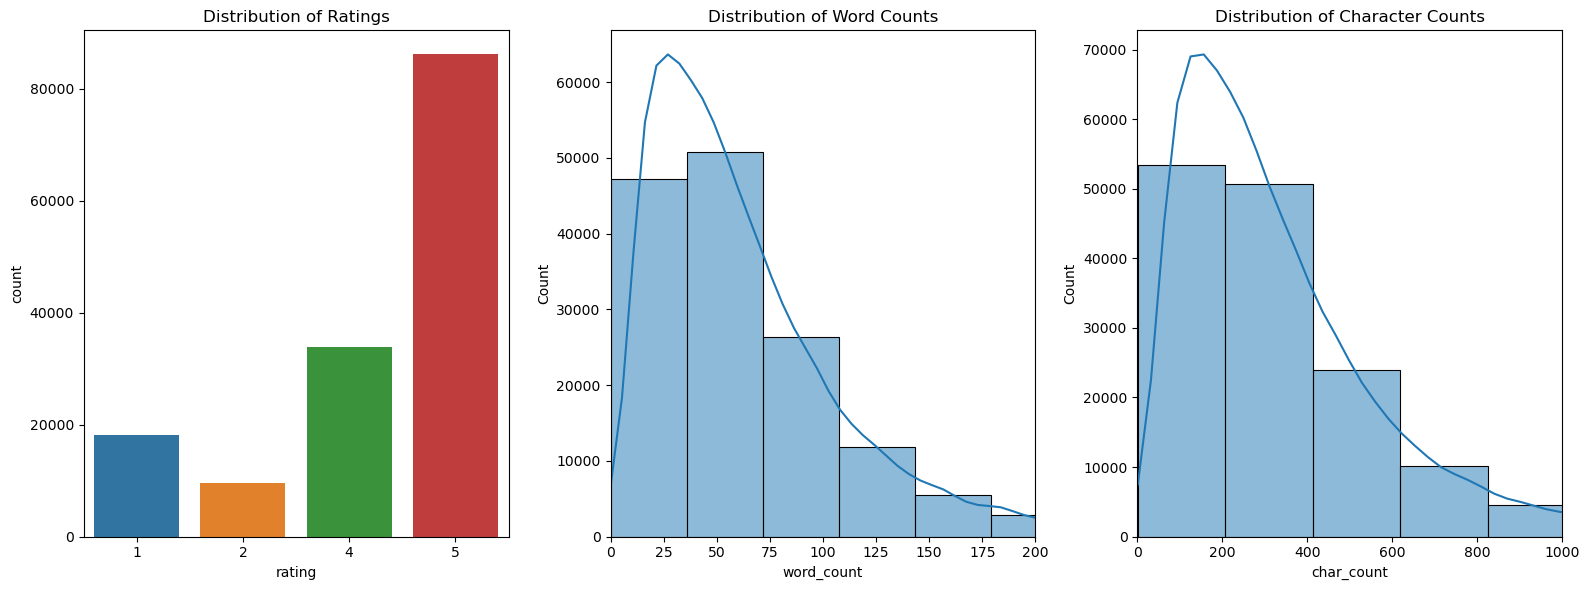

In [7]:
# Rename the columns
data.columns = ['review_text', 'rating']

# Dropping missing values for text analysis
data_clean = data.dropna(subset=['review_text'])

# Adding word count and character count columns
data_clean['word_count'] = data_clean['review_text'].apply(lambda x: len(x.split()))
data_clean['char_count'] = data_clean['review_text'].apply(len)
print(data_clean[['word_count', 'char_count']].describe())

# If you want to visualize the distributions, you can use the following code:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions
plt.figure(figsize=(16, 6))

# Distribution of Ratings
plt.subplot(1, 3, 1)
sns.countplot(data=data_clean, x='rating')
plt.title('Distribution of Ratings')

# Distribution of Word Counts
plt.subplot(1, 3, 2)
sns.histplot(data=data_clean, x='word_count', bins=30, kde=True)
plt.title('Distribution of Word Counts')
plt.xlim(0, 200)  # Limiting for better visualization

# Distribution of Character Counts
plt.subplot(1, 3, 3)
sns.histplot(data=data_clean, x='char_count', bins=30, kde=True)
plt.title('Distribution of Character Counts')
plt.xlim(0, 1000)  # Limiting for better visualization

plt.tight_layout()
plt.show()

In [8]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment

# Apply the function to the reviews
data_clean['sentiment'] = data_clean['review_text'].apply(calculate_sentiment)

# Extract polarity and subjectivity
data_clean['polarity'] = data_clean['sentiment'].apply(lambda x: x.polarity)
data_clean['subjectivity'] = data_clean['sentiment'].apply(lambda x: x.subjectivity)

# Display basic statistics for polarity and subjectivity
print(data_clean[['polarity', 'subjectivity']].describe())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7020\3834385516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sentiment'] = data_clean['review_text'].apply(calculate_sentiment)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7020\3834385516.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['polarity'] = data_clean['sentiment'].apply(lambda x: x.polarity)


            polarity   subjectivity
count  147876.000000  147876.000000
mean        0.219094       0.524569
std         0.230895       0.182067
min        -1.000000       0.000000
25%         0.074359       0.431349
50%         0.207842       0.528981
75%         0.350000       0.628472
max         1.000000       1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7020\3834385516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['subjectivity'] = data_clean['sentiment'].apply(lambda x: x.subjectivity)


In [18]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


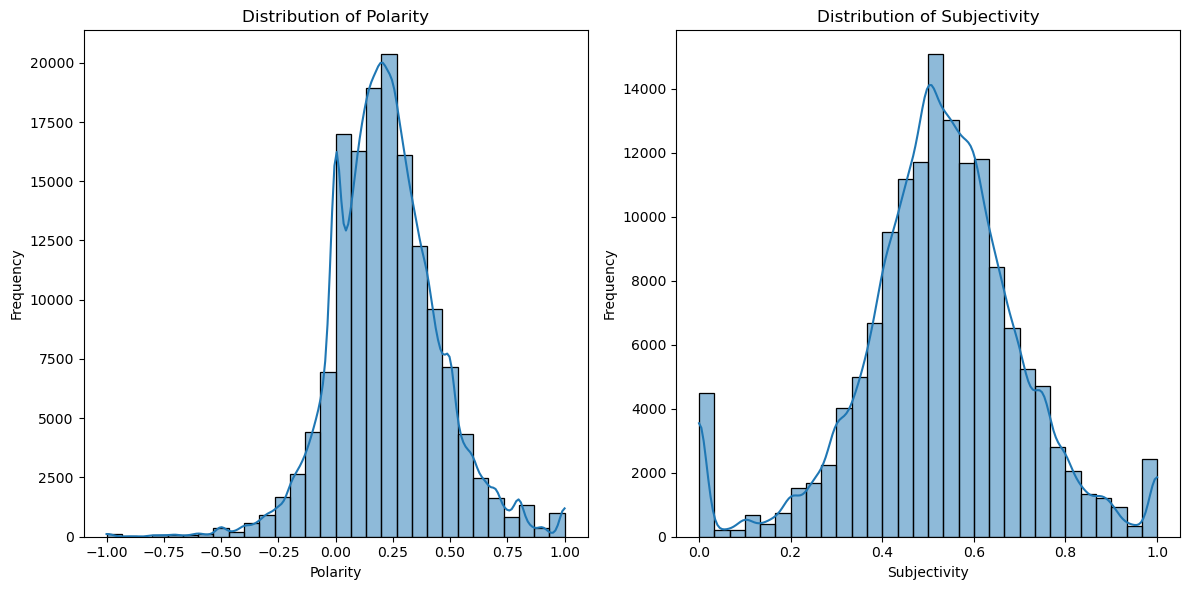

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Polarity Histogram
plt.subplot(1, 2, 1)
sns.histplot(data_clean['polarity'], bins=30, kde=True)
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subjectivity Histogram
plt.subplot(1, 2, 2)
sns.histplot(data_clean['subjectivity'], bins=30, kde=True)
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from collections import Counter
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Optimized function to clean and tokenize text
def clean_tokenize_optimized(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    return [word for word in words if word not in stop_words]

# Tokenize all reviews
tokenized_reviews = data_clean['review_text'].apply(clean_tokenize_optimized)

# Flatten the list of words
all_words = [word for review in tokenized_reviews for word in review]

# Count and display the most common words
word_count = Counter(all_words)
print(word_count.most_common(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('one', 47768), ('great', 40694), ('like', 32256), ('good', 28646), ('movie', 27853), ('would', 25766), ('get', 23973), ('well', 23294), ('use', 23068), ('time', 22723)]


In [15]:
# Assume 'all_words' contains all the words from the reviews
word_count = Counter(all_words)

# Get the top N most common words
top_n = 10  # You can change this number to display more or fewer words
most_common_words = word_count.most_common(top_n)
words, counts = zip(*most_common_words)


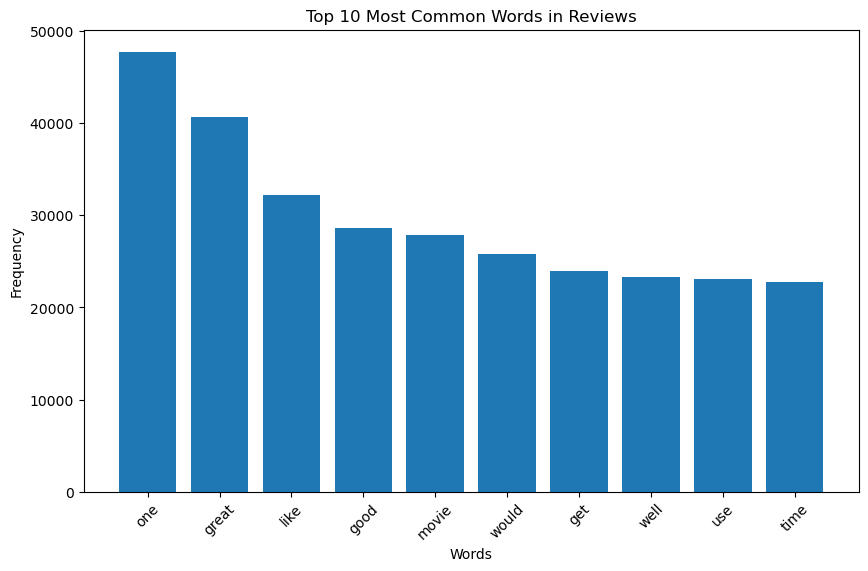

In [16]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Common Words in Reviews'.format(top_n))
plt.xticks(rotation=45)  # Rotate the words on x-axis for better readability
plt.show()


In [20]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [21]:
# Combine all review texts into a single string
combined_text = ' '.join(data_clean['review_text'])


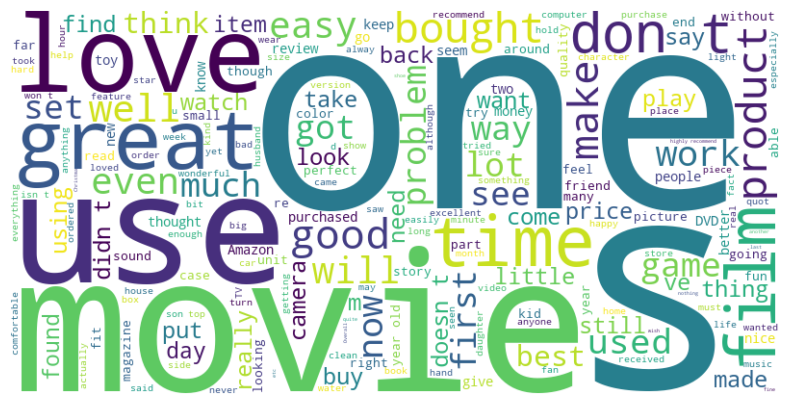

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


 1AMAZON DATASET (USING ARROWS)
DATA PREPARATION AND ANALYSIS - BIBEK ( WE GOT PUBLICALLY AVAILABLE DATASET)
EDA -KAUSHIK
PRADEEP , SATHVIK - MODEL TRAINING
2- EDA ANALYSIS
 3 
 4BOXES FOR 4 MODELS.  COMPARE THE MODELS.
 